# K-Means Clustering

 K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters.
Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters,and for K=3, there will be three clusters, and so on.

The k-means clustering algorithm mainly performs two tasks:
 1.Determines the best value for K center points or centroids by an iterative process.
 2.Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, 
   create a cluster.



In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [2]:
# Create 5 blobs of 2,000 random data
n_samples = 2000
random_state = 42
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=5)

Text(0.5, 1.0, 'No Clusters Assigned')

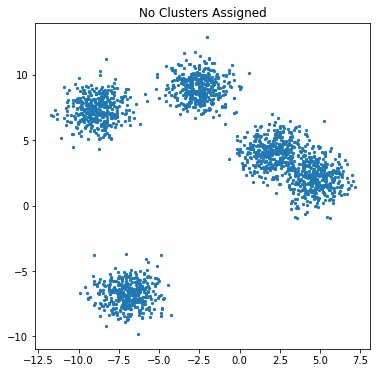

In [3]:
# visualize the clusters
# Plot the random blub data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.title(f"No Clusters Assigned")

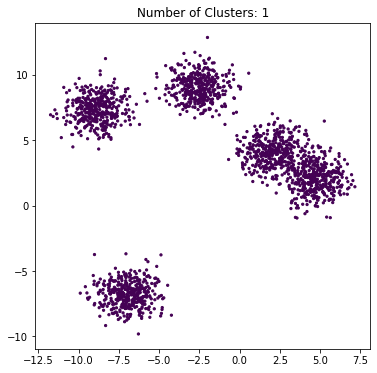

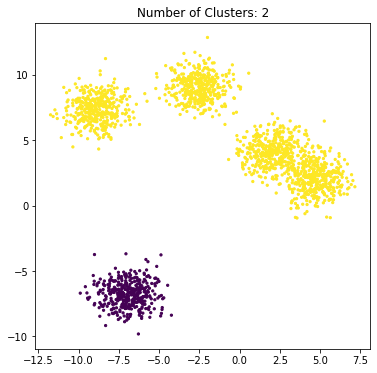

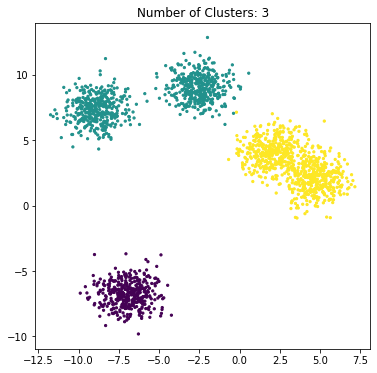

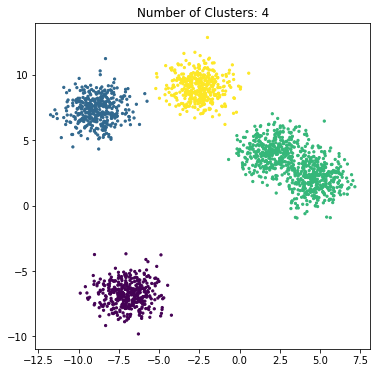

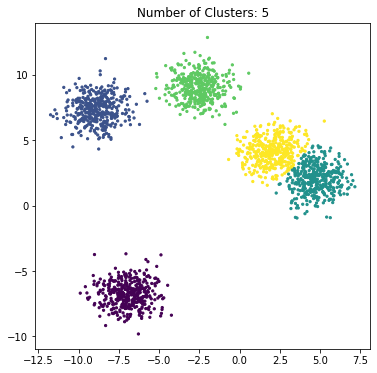

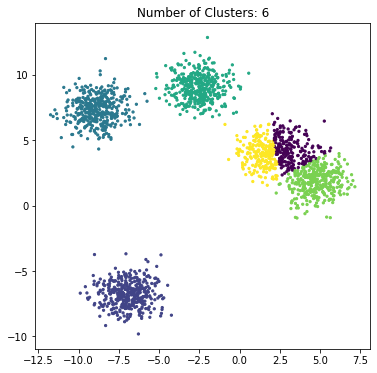

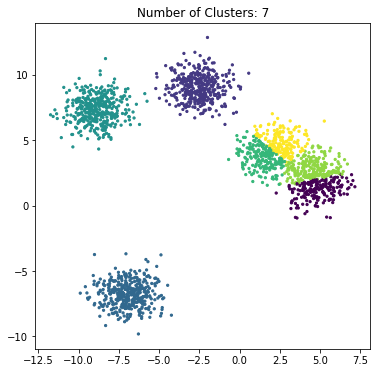

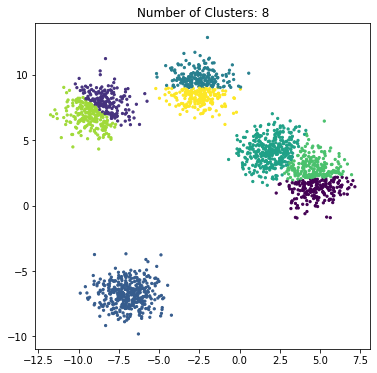

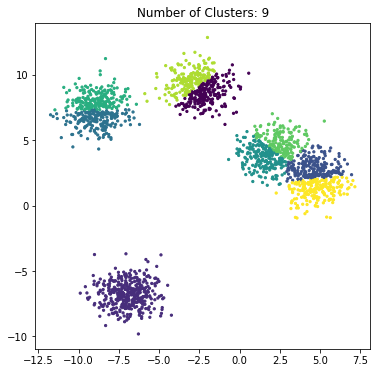

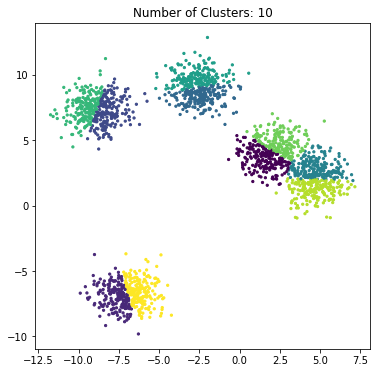

In [4]:
# Plot the data and color code based on clusters
# changing the number of clusters 
for i in range(1,11):
    plt.figure(figsize=(6, 6))
    
    # Predicting the clusters
    y_pred = KMeans(n_clusters=i, random_state=random_state).fit_predict(X)
# plotting the clusters
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=5)
    plt.title(f"Number of Clusters: {i}")
    plt.show();

In [5]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X)  

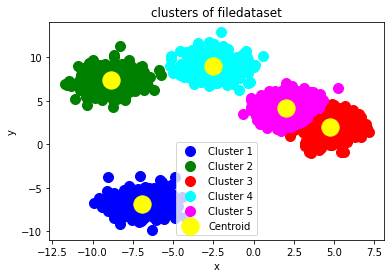

In [6]:
#visulaizing the clusters  
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(X[y_predict == 3, 0], X[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(X[y_predict == 4, 0], X[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('clusters of filedataset')  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend()  
plt.show()  

# Inertia

 which is the within-cluster sum of squares of distances to the cluster center. 
This is called “inertia”. The algorithm aims to choose centroids that minimize the inertia, 
which can be recognized as a measure of how internally coherent clusters are.

The inertia score for the 10 different cluster numbers we did before, and saves 
them in a list that we use to plot (more on this later). The plot of inertial score vs 
the number of clusters is called the “Elbow Curve”.


In [7]:
km = KMeans(n_clusters=i, random_state=random_state)
km.fit(X)
km.inertia_

2525.669464438438

# Silhouette Score

Silhouette score is based on a combination of cluster
Cohesion (how close points in a cluster are relative to each other) and
Separation (how far the clusters are relative to each other).

Silhouette score is between -1 (poor clustering) and +1 (excellent clustering).

In [8]:
# Calculating the inertia and silhouette_score¶
inertia = []
sil = []
# changing the number of clusters 
for k in range(2,11):
    
    km = KMeans(n_clusters=k, random_state=random_state)
    km.fit(X)
    y_pred = km.predict(X)
    
    inertia.append((k, km.inertia_))
    sil.append((k, silhouette_score(X, y_pred)))

Text(0.5, 1.0, 'Silhouetter Score Curve')

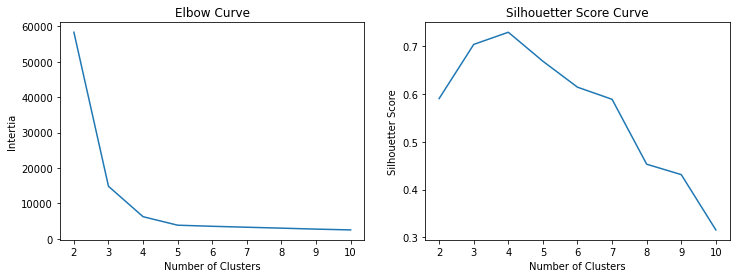

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title('Elbow Curve')


# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')


In [11]:
score = silhouette_score(X, km.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.316


# Hierarchical Clustering

A Hierarchical clustering method works via grouping data into a tree of clusters. Hierarchical clustering begins 
by treating every data point as a separate cluster. Then, it repeatedly executes the subsequent steps:

1.Identify the 2 clusters which can be closest together, and 
2.Merge the 2 maximum comparable clusters.
We need to continue these steps until all the clusters are merged together.
In Hierarchical Clustering, the aim is to produce a hierarchical series of nested clusters. A diagram called Dendrogram

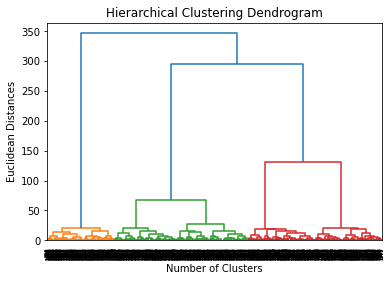

In [12]:
# Visualise Hierarchical Clustering
#Finding the optimal number of clusters using the dendrogram  

import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(X, method="ward")) 

plt.title('Hierarchical Clustering Dendrogram')  
plt.ylabel("Euclidean Distances")  
plt.xlabel('Number of Clusters')  
plt.show()  

# Agglomerative

Initially consider every data point as an individual Cluster and at every step, merge the nearest pairs of the cluster.
(It is a bottom-up method). At first, every dataset is considered an individual entity or cluster. At every iteration, 
the clusters merge with different clusters until one cluster is formed. 

The algorithm for Agglomerative Hierarchical Clustering is:
1.Calculate the similarity of one cluster with all the other clusters.
2.Consider every data point as an individual cluster
3.Merge the clusters which are highly similar or close to each other.
4.Recalculate the proximity matrix for each cluster
5.Repeat Steps 3 and 4 until only a single cluster remains.

In [16]:
#training the hierarchical model on dataset 

from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(X)  
silhouette_score(X,cl)

0.36982837120871054

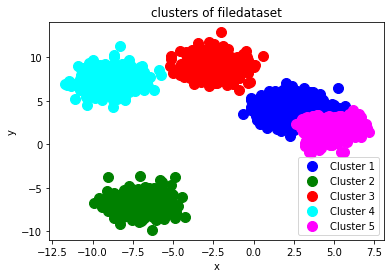

In [17]:
#visulaizing the clusters 

plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  
plt.title('clusters of filedataset')  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend()  
plt.show()  